<a href="https://colab.research.google.com/github/Kazuto-Takahashi/Kensaku_gijutu/blob/main/kensakugijutu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 検索技術

期末レポート

21X3108 高橋 一翔



---
ライブラリのインポート


---



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

<ipython-input-5-e72df9c62289>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')




---


データの読み込みと前処理

---



In [ ]:
df = pd.read_csv('/content/Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from pickle import FALSE
df_train = pd.read_csv('/content/Titanic_train.csv')
df_test_X = pd.read_csv('/content/Titanic_test.csv')
df_test_y = pd.read_csv('/content/gender_submission.csv')
df_test_y = df_test_y.drop(['PassengerId'], axis=1)
df_test = pd.concat([df_test_X, df_test_y], axis=1)

#欠損値の削除
df_train = df_train.dropna(subset=['Age'])
df_test = df_test.dropna(subset=['Age', 'Fare'])

#性別がmaleまたはfemaleで与えられているので, 数値に変換
df_train['Sex'] = df_train['Sex'].replace({'male' : 0, 'female' : 1})
df_test['Sex'] = df_test['Sex'].replace({'male' : 0, 'female' : 1})

df_train.to_csv('Titanic_heatmap.csv', index=False)
df_heatmap = pd.read_csv('/content/Titanic_heatmap.csv')

#目的変数'Survived'をyに代入
y_train = df_train['Survived']
y_test = df_test['Survived']

#不要なラベルの削除
df_train = df_train.drop(['PassengerId', 'Survived', 'Name', 'Embarked', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Survived', 'Name',  'Embarked', 'Ticket', 'Cabin'], axis=1)

In [ ]:
df_train.to_csv('Titanic_train_treated.csv', index=False)
df_test.to_csv('Titanic_test_treated.csv', index=False)

In [ ]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,0,26.0,0,0,30.0000


In [ ]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750
411,1,1,37.0,1,0,90.0000
412,3,1,28.0,0,0,7.7750
414,1,1,39.0,0,0,108.9000





---
データ分析

---



<ipython-input-11-f09d3b82d537>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_heatmap.corr()


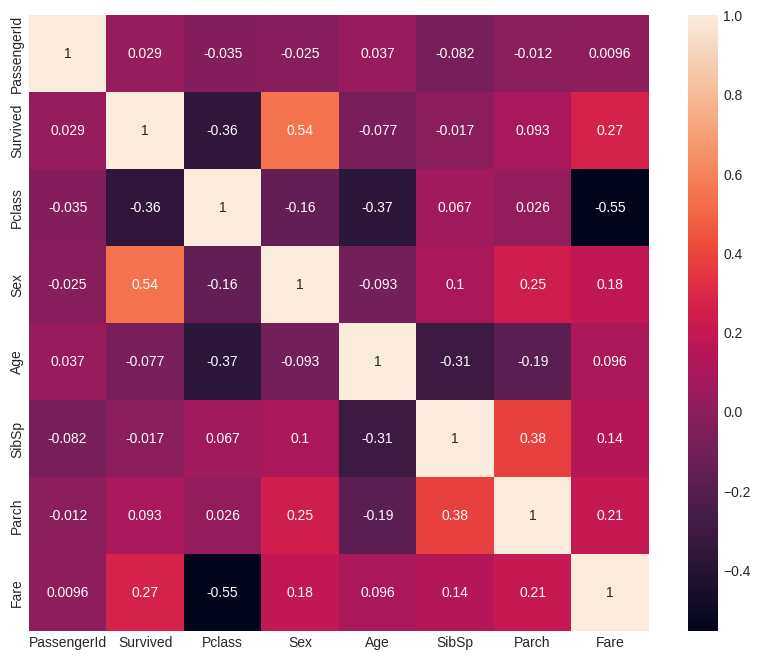

In [ ]:
corr = df_heatmap.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

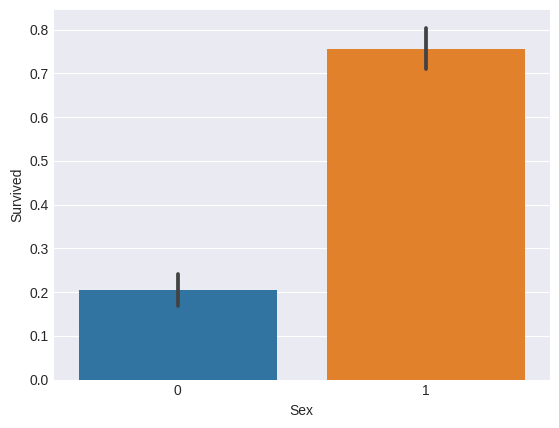

In [ ]:
sns.barplot(data=df_heatmap, x='Sex', y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

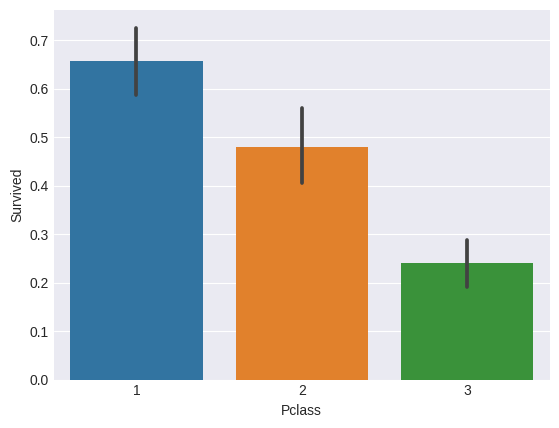

In [ ]:
sns.barplot(data=df_heatmap, x='Pclass', y='Survived')



---

ランダムフォレストの適用

---



In [ ]:
forest = RandomForestClassifier(n_estimators=10, max_features=2, max_depth=3, criterion = 'gini')

forest.fit(df_train, y_train)

print(f'Train Accuracy: {forest.score(df_train, y_train):.3f}')
print(f'Test Accuracy: {forest.score(df_test, y_test):.3f}')

Train Accuracy: 0.812
Test Accuracy: 0.979




---
特徴量の重要度


---



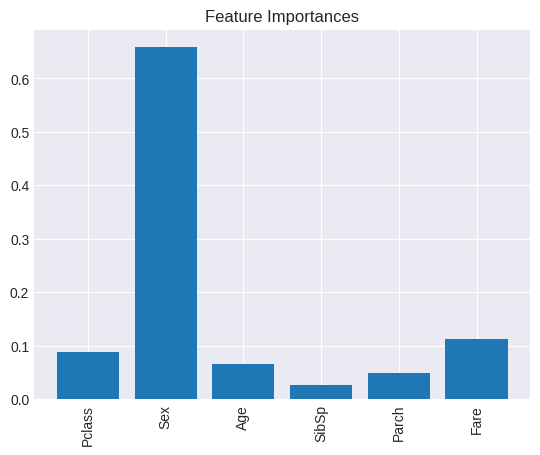

In [ ]:
n_features = 6
plt.title('Feature Importances')
plt.bar(range(n_features), forest.feature_importances_, align = 'center')
plt.xticks(range(n_features), df_train.columns, rotation = 90)
#plt.xlim([-1, X_train.shape[1]])
plt.show()